# Receipt OCR  

### ressources

http://asprise.com/ocr/api/docs/html/receipt-ocr.html <br/>
https://asprise.com/receipt-ocr-data-capture-api/extract-text-reader-scanner-index.html

In [4]:
import os
import requests
import pandas as pd
import json
from googletrans import Translator


print("=== Python Receipt OCR using API")

=== Python Receipt OCR using API


### OCRing the receipt

In [5]:
OverAsked = False
receiptOcrEndpoint = 'https://ocr.asprise.com/api/v1/receipt' # Receipt OCR API endpoint
folder_path_img = "receipts/jpg" #folder path
folder_path_json = "receipts/json" 
folder_path_pdf = "receipts/pdf"

### Convert pdf to jpg

In [6]:
from pdf2image import convert_from_path
 
for filename in os.listdir(folder_path_pdf):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(folder_path_pdf, filename)
        
        # Store Pdf with convert_from_path function
        images = convert_from_path(pdf_path)
        
        for i in range(len(images)): 
            # Save pages as images in the pdf
            jpg_filename = folder_path_img + "/" + os.path.splitext(filename)[0] +'.jpg'
            images[i].save(jpg_filename, 'JPEG')

        print(f"Processed {filename} - Result saved to {jpg_filename}")


#### Read jpg file and save into json

In [7]:
#iterate over the files in the folder 
if OverAsked == False:
  for filename in os.listdir(folder_path_img):
    if filename.endswith(".jpg"):
        image_path = os.path.join(folder_path_img, filename)
        r = requests.post(receiptOcrEndpoint, data = { \
        'client_id': 'TEST',        # Use 'TEST' for testing purpose \
        'recognizer': 'auto',       # can be 'US', 'CA', 'JP', 'SG' or 'auto' \
        'ref_no': 'ocr_python_123', # optional caller provided ref code \
        }, \
        files = {"file": open(image_path, "rb")})

        # Save the json response to a file
        json_filename = os.path.splitext(filename)[0] + ".json"
        json_path = os.path.join(folder_path_json, json_filename)        
        with open(json_path, "w") as outfile:
            json.dump(r.json(), outfile)
            #https://www.geeksforgeeks.org/reading-and-writing-json-to-a-file-in-python/

        print(f"Processed {filename} - Result saved to {json_filename}")
        print(r.text)

Processed lidl-15-06-23.jpg - Result saved to lidl-15-06-23.json
{
  "ocr_type" : "receipts",
  "request_id" : "P_92.184.108.112_lj4r41n2_vzg",
  "ref_no" : "ocr_python_123",
  "file_name" : "lidl-15-06-23.jpg",
  "request_received_on" : 1687293713487,
  "success" : true,
  "image_width" : 753,
  "image_height" : 2200,
  "image_rotation" : 0,
  "recognition_completed_on" : 1687293714066,
  "receipts" : [ {
    "merchant_name" : "Müllerstraße 48-48a",
    "merchant_address" : "13349 Berlin-Wedding",
    "merchant_phone" : null,
    "merchant_website" : null,
    "merchant_tax_reg_no" : null,
    "merchant_company_reg_no" : null,
    "region" : null,
    "mall" : null,
    "country" : "DE",
    "receipt_no" : "DE813388858",
    "date" : "2023-06-15",
    "time" : "20:00",
    "items" : [ {
      "amount" : 0.75,
      "category" : null,
      "description" : "Paprika rot kg",
      "flags" : " A",
      "qty" : null,
      "remarks" : null,
      "tags" : null,
      "unitPrice" : null
 

In [ ]:
with open(folder_path_json+"/test.json", "r") as openfile:
    #reading from json file
    json_object = json.load(openfile)

print(json_object)

{'ocr_type': 'receipts', 'request_id': 'P_92.184.97.11_lj1jfdr2_i4p', 'ref_no': 'AspDemo_1687099400190_538', 'file_name': 'test.jpg', 'request_received_on': 1687099406943, 'success': True, 'image_width': 694, 'image_height': 1650, 'image_rotation': 0.009, 'recognition_completed_on': 1687099408070, 'receipts': [{'merchant_name': 'LIDL Müllerstraße 48-48a', 'merchant_address': '13349 Berlin-Wedding', 'merchant_phone': None, 'merchant_website': None, 'merchant_tax_reg_no': None, 'merchant_company_reg_no': None, 'region': None, 'mall': None, 'country': 'DE', 'receipt_no': 'DE813388858', 'date': '2023-06-17', 'time': '14:15', 'items': [{'amount': 1.12, 'category': None, 'description': 'Bananen kg', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 2.99, 'category': None, 'description': 'Apfel rot, fru.-süß', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 1.99, 'category': None, 'description': 'Mexikanisches G

### Find all the items in the receipt

In [ ]:
if json_object["receipts"] is not None: 
    receipt_object = json_object["receipts"]
    # Access the "items" list within the "receipts" object
    items = json_object["receipts"][0]["items"]
    total = json_object["receipts"][0]["total"]
    taxes = json_object["receipts"][0]["tax"]
    print("items: ",items)
    print("total: ",total)
    print("taxes: ",taxes)

else:
    print("Error is"+json_object["message"])

items:  [{'amount': 1.12, 'category': None, 'description': 'Bananen kg', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 2.99, 'category': None, 'description': 'Apfel rot, fru.-süß', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 1.99, 'category': None, 'description': 'Mexikanisches Gemüse', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 1.99, 'category': None, 'description': 'Feinschmeckergemüse', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 2.49, 'category': None, 'description': 'Knuspermüsli + Schoko', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 0.89, 'category': None, 'description': 'Apfelmus gezuckert', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 0.75, 'category': None, 'description': 'Traube-Nuß Sch. 100g', 'flags': ' A

### Translation

Ressources : https://www.thepythoncode.com/article/translate-text-in-python

In [ ]:
#init the Google API translator
translator = Translator()

In [ ]:
for item in items: 
    description = item["description"]
    translation = translator.translate(description, dest="fr")
    item["description"] = translation.text
    print("Description : ", item["description"])

Description :  Banane kg
Description :  oignons jaunes
Description :  PC mangue
Description :  Pêche
Description :  Légumes asiatiques
Description :  Bioland Type 630
Description :  H-lait H, 1,5% OGT
Description :  Fr.aier.a.bo.ha octobre
Description :  Sel de piment
Description :  Fusillis
Description :  Sauce de pomme sugared
Description :  Carotte multi-fruits
Description :  Canneberries sult.mix
Description :  Pain maître
Description :  Poulet
Description :  payer
Description :  Carte de crédit
Description :  Un 7% 1 6523,54
Description :  B 19% 0,321,67


### Product

In [ ]:
#iterate over each item and add them if flaf != none
products = []

for item in items:
    flag = item["flags"]
    if flag != "":
        products.append(item)
    #elif :
        #find total price
    else:
        #nothing to do
        print()
print(products)





[{'amount': 1.19, 'category': None, 'description': 'Banane kg', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 2.99, 'category': None, 'description': 'Nectarine', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 1.79, 'category': None, 'description': 'Del.Koch Ham', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 0.89, 'category': None, 'description': 'Sauce de pomme sugared', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 0.99, 'category': None, 'description': 'Jeunes haricots', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 4.05, 'category': None, 'description': 'Papier toilette 3lg', 'flags': ' B', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 2.85, 'category': None, 'description': 'Torchons de cuisine', 'flags': ' B', 'qty': None, 'remarks':

### Pandas dataframe

In [ ]:
items_df = pd.DataFrame(items)
products_df = pd.DataFrame(products)

In [ ]:
export_csv = pd.DataFrame(products_df[["description", "amount"]])
print(export_csv)
export_csv.to_csv('receipts/export_data.csv', index=False, sep=";")

               description  amount
0                Banane kg    1.19
1                Nectarine    2.99
2             Del.Koch Ham    1.79
3   Sauce de pomme sugared    0.89
4          Jeunes haricots    0.99
5      Papier toilette 3lg    4.05
6      Torchons de cuisine    2.85
7                      Par    0.65
8      Hygienespray Univer    1.95
9                   Éponge    0.75
10   Sacs à déchets 601 25    1.89
11              Tout usage    1.99
12   Fresh Hold '' 0384936    9.99


## All in one

In [11]:
#init the Google API translator
translator_all = Translator()
#initialize
merchant_name_all = []
country_all = []
date_all = []
products_all = []
total_all = []
taxes_all = []
items_all_all = []


for filename in os.listdir(folder_path_json):
    #read json file
    if filename.endswith(".json"):
        json_path = os.path.join(folder_path_json, filename)
        #Read all json in json folder
        with open(json_path, "r") as openfile:
            #reading from json file
            json_object_all = json.load(openfile)
        print(json_object_all)

        if json_object_all["success"] != False:
            #Sort the items, ... in the reicept
            if json_object_all["receipts"] is not None:
                receipt_object_all = json_object_all["receipts"]
                #receipt_object_all.append(json_object_all["receipts"])
                # Access the "items" list within the "receipts" object
                items_all = json_object_all["receipts"][0]["items"]
                #items_all.append(json_object_all["receipts"][0]["items"])
                print("items: ",items_all)
                total_all.append(json_object_all["receipts"][0]["total"])
                print("total: ",total_all)
                taxes_all.append(json_object_all["receipts"][0]["tax"])
                merchant_name_all.append(json_object_all["receipts"][0]["merchant_name"])
                country_all.append(json_object_all["receipts"][0]["country"])
                date_str = str(json_object_all["receipts"][0]["time"]) if json_object_all["receipts"][0]["time"] else ""
                date_str += "-"
                date_str += str(json_object_all["receipts"][0]["date"]) if json_object_all["receipts"][0]["date"] else ""
                date_all.append(date_str)

                #add for each item merchant_name country_all, date
                if items_all is not None:
                    for item in items_all:
                        item.update({"merchant_name": json_object_all["receipts"][0]["merchant_name"]})
                        item.update({"country": json_object_all["receipts"][0]["country"]})
                        item.update({"date": date_str})
                else:
                    print("Any items detected")  
            else:
                print("Error is"+json_object_all["message"])
        if items_all is not None:
            #translate all the descriptions
            try:
                for item in items_all: 
                    #translation_all = translator_all.translate(item["description"], dest="fr")
                    #item["description"] = translation_all.text
                    print("Description : ", item["description"])
            except:
                print("translation canceled")        

            #find all the product, only the product -> find with tag ?
            for item in items_all:
                flag = item["flags"]
                if flag != "":
                    products_all.append(item)
            print(products_all)

            #store all items
            for item in items_all:
                items_all_all.append(item)
        else:
            print("Any items detected -- check OCRing method")
        
#save data into csv file
if items_all and products_all is not None:
    #export only product
    pd.DataFrame(pd.DataFrame(products_all)[["description", "amount", "date"]]).to_csv('receipts/export_product_only.csv', index=False, sep=";")
    #export product all
    pd.DataFrame(pd.DataFrame(products_all)).to_csv('receipts/export_all_product.csv', index=False, sep=";")
    #export items
    #pd.DataFrame(pd.DataFrame(items_all_all)).to_csv('receipts/export_all_items.csv', index=False, sep=";")


{'ocr_type': 'receipts', 'request_id': 'P_92.184.117.81_lj1wnrfo_uay', 'ref_no': 'ocr_python_123', 'file_name': 'lidl-03-06-23-2.jpg', 'request_received_on': 1687121632933, 'success': True, 'image_width': 831, 'image_height': 2200, 'image_rotation': -0.016, 'recognition_completed_on': 1687121633408, 'receipts': [{'merchant_name': 'Müllerstraße 48-48a', 'merchant_address': '13349 Berlin-Wedding', 'merchant_phone': None, 'merchant_website': None, 'merchant_tax_reg_no': None, 'merchant_company_reg_no': None, 'region': None, 'mall': None, 'country': 'DE', 'receipt_no': 'DE813388858', 'date': '2023-06-03', 'time': '09:56', 'items': [{'amount': 1.19, 'category': None, 'description': 'Bananen kg', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 2.99, 'category': None, 'description': 'Nektarinen', 'flags': ' A', 'qty': None, 'remarks': None, 'tags': None, 'unitPrice': None}, {'amount': 1.79, 'category': None, 'description': 'Del.Kochschinken', 'flags':

# Analyse all product and CSV file

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib widget
plt.style.use('default')

In [25]:
#import and create dataset
df_products = pd.read_csv("receipts/export_all_product.csv", sep=";")
#df_items = pd.read_csv("receipts/export_all_items.csv", sep=";")

df_products.dropna(axis=1, how='all', inplace=True)
# when Müllerstraße 48-48a is in == LIDL
condition_LIDL = df_products['merchant_name'].str.contains('Müllerstraße 48-48a')
df_products.loc[condition_LIDL, 'merchant_name'] = "LIDL"

df_products.head()
#df_products.tail(10)

,amount,description,flags,merchant_name,country,date
0,1.19,Bananen kg,A,LIDL,DE,09:56-2023-06-03
1,2.99,Nektarinen,A,LIDL,DE,09:56-2023-06-03
2,1.79,Del.Kochschinken,A,LIDL,DE,09:56-2023-06-03
3,0.89,Apfelmus gezuckert,A,LIDL,DE,09:56-2023-06-03
4,0.99,Junge Brechbohnen,A,LIDL,DE,09:56-2023-06-03


### group by article

In [42]:
pivot = df_products.pivot_table(values='amount', index='description', columns='merchant_name', aggfunc='sum', margins=True).sort_values('All', ascending=False)
pivot.head(20)

merchant_name,LIDL,All
description,,
All,175.64,175.64
Hähnchen-Geschn,11.97,11.97
Frischhalt '0384936,9.99,9.99
Rinderhack 500g,9.68,9.68
Asiatisches Gemüse,5.97,5.97
Mehrfrucht-Karotten,5.97,5.97
Snackmandeln XXL,5.49,5.49
Nektarinen,5.48,5.48
Olivenöl Extra,4.99,4.99


In [43]:
grouped_df = pd.DataFrame(df_products.groupby('description')['amount'].sum())
grouped_df['count'] = df_products.groupby('description')['amount'].count()

print(grouped_df.sort_values('amount', ascending=False))

                     amount  count
description                       
Hähnchen-Geschn       11.97      3
Frischhalt '0384936    9.99      1
Rinderhack 500g        9.68      2
Asiatisches Gemüse     5.97      3
Mehrfrucht-Karotten    5.97      3
...                     ...    ...
Haferf. Kern           0.79      1
Fusilli                0.79      1
Paprika rot kg         0.75      1
Topfschwamm            0.75      1
Per.Tragetasche        0.65      1

[61 rows x 2 columns]


### Resum of dataset

In [14]:
df_products.describe()

,amount
count,86.000000
mean,2.042326
std,1.399138
min,0.650000
25%,0.995000
50%,1.985000
75%,2.465000
max,9.990000


<Axes: xlabel='description'>

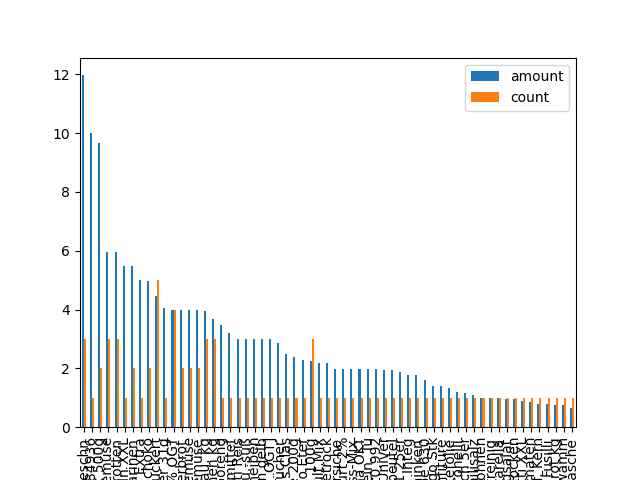

In [44]:
grouped_df.sort_values('amount', ascending=False).plot.bar()

In [26]:
# order by product -> find top product 
# growth of top product